# Illustrates Pandas Stack funcationality

## Reads the space delimited Atalantic Meridional Mode (AMM) data file
## https://psl.noaa.gov/data/timeseries/monthly/AMM/ammsst.data



### NCSU Tropical & Large Scale Dynamics
- April 2023

In [1]:
# IMPORT PACKAGES
import matplotlib
import datetime as dt
import pandas as pd

In [ ]:
# obtain the data from https://psl.noaa.gov/data/timeseries/monthly/AMM/ammsst.data

In [2]:
# read the AMM data file
# skip the header line and several lines at the bottom of the fie

amm_file_path = './ammsst.data.txt'
df=pd.read_csv(amm_file_path, header=None, delim_whitespace=True, skiprows=1, skipfooter=5,engine='python')


# inspect the data
print(df.head().to_string())

print(df.tail().to_string())

     0     1     2     3     4     5     6     7     8     9     10    11    12
0  1948  0.66  0.00  1.00  1.86  1.30  2.51  1.63  0.55 -0.48 -0.24  0.72 -0.93
1  1949 -0.20 -0.47 -1.13 -1.22 -1.88 -1.55 -0.19  0.77  0.89  0.80  0.16  0.46
2  1950  0.53 -1.07 -1.26  0.72  1.05  0.28  0.21  1.21  1.26  1.27  1.87  3.03
3  1951  2.14  0.94  2.29  3.63  3.70  3.85  2.87  0.98 -0.04 -0.97 -1.19 -2.02
4  1952 -2.89 -1.44  0.92  1.13  2.09  3.27  2.36  2.04  2.24  2.08  2.25  3.63
      0     1     2     3      4      5      6      7      8      9      10     11     12
71  2019 -0.70 -0.03 -3.01  -3.54  -2.08  -1.35  -0.14   0.33   2.33   2.25  -0.02  -1.19
72  2020 -1.87 -1.51 -0.49   0.19  -1.04   0.52  -0.59   0.29   1.90   3.77   2.92   3.60
73  2021  3.39  1.97  0.16  -0.97  -2.29  -4.13  -4.12  -2.29   1.31   1.83   3.18   2.69
74  2022  2.97  2.10 -1.27  -2.44  -0.24  -0.60  -1.57  -0.21   2.20   2.80   2.20   1.61
75  2023  1.29  0.11  1.02 -99.00 -99.00 -99.00 -99.00 -99.00 -99.00 -

In [3]:
# as we see above the data is organized in rows.
# lets make it easier to work with by reshaping the dataframe

In [4]:
# create the amm dataframe by stacking the columns


# first make the year column the index column
df=df.rename(columns={df.columns[0]: "Year" }).set_index('Year')

amm = df.stack().reset_index()
amm.rename(columns = {'level_1':'Month'}, inplace = True)
amm=amm.rename(columns={amm.columns[2]: "AMM" })
amm['date'] = pd.to_datetime(dict(year=amm.Year, month=amm.Month, day=1))

In [8]:

# inspect the data
print(amm.head().to_string())
print(amm.tail().to_string())

     Year  Month   AMM       date  AMM_3mon
373  1979      2  2.50 1979-02-01       NaN
374  1979      3  2.37 1979-03-01       NaN
375  1979      4  2.16 1979-04-01  2.343333
376  1979      5  2.42 1979-05-01  2.316667
377  1979      6  1.96 1979-06-01  2.180000
     Year  Month   AMM       date  AMM_3mon
800  2014      9  1.80 2014-09-01 -0.223333
801  2014     10  3.18 2014-10-01  1.546667
802  2014     11  3.10 2014-11-01  2.693333
803  2014     12  1.35 2014-12-01  2.543333
804  2015      1 -0.80 2015-01-01  1.216667


In [5]:
# subset the data for the date range

# time slice 
date1 = '1979-01-16 12:00'
date2 = '2015-01-16 12:00'
mask = ( amm['date'] >= date1)  & (amm['date'] <= date2)


# subset the amm
amm = amm.loc[mask]
# create a 3 month rolling mean
amm['AMM_3mon'] = amm['AMM'].rolling(3).mean()
amm.head()

,Year,Month,AMM,date,AMM_3mon
373,1979,2,2.50,1979-02-01,NaN
374,1979,3,2.37,1979-03-01,NaN
375,1979,4,2.16,1979-04-01,2.343333
376,1979,5,2.42,1979-05-01,2.316667
377,1979,6,1.96,1979-06-01,2.180000


<AxesSubplot: xlabel='date'>

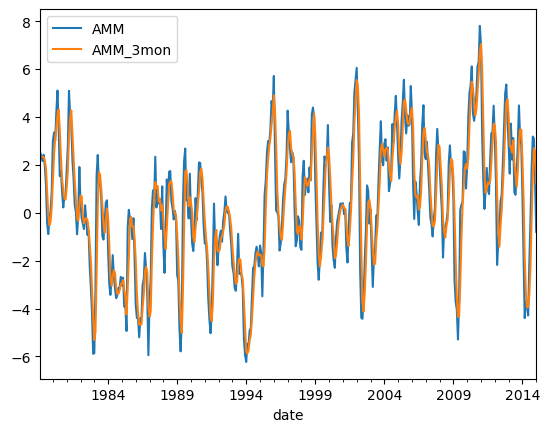

In [7]:
amm.plot(x='date', y=['AMM', 'AMM_3mon'])